# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "q=" + city + "&appid=" + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | shache
Processing Record 4 of Set 1 | shakawe
Processing Record 5 of Set 1 | sao pedro do sul
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | cockburn town
Processing Record 9 of Set 1 | hammerfest
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | dhidhdhoo
Processing Record 12 of Set 1 | waspan
Processing Record 13 of Set 1 | thunder bay
Processing Record 14 of Set 1 | raduzhny
Processing Record 15 of Set 1 | undurkhaan
Processing Record 16 of Set 1 | chernyshevskiy
Processing Record 17 of Set 1 | breckenridge
Processing Record 18 of Set 1 | vilhena
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | kerikeri
Processing Record 2

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,251.99,97,99,2.57,RU,1736375547
1,edinburgh of the seven seas,-37.0676,-12.3116,290.71,98,88,4.66,SH,1736375549
2,saipan,15.1355,145.7010,300.54,85,75,5.66,MP,1736375550
3,pathein,16.7833,94.7333,291.71,86,4,2.56,MM,1736375551
4,dzhalagash,45.0833,64.6667,265.34,69,3,3.68,KZ,1736375552


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,251.99,97,99,2.57,RU,1736375547
1,edinburgh of the seven seas,-37.0676,-12.3116,290.71,98,88,4.66,SH,1736375549
2,saipan,15.1355,145.7010,300.54,85,75,5.66,MP,1736375550
3,pathein,16.7833,94.7333,291.71,86,4,2.56,MM,1736375551
4,dzhalagash,45.0833,64.6667,265.34,69,3,3.68,KZ,1736375552


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

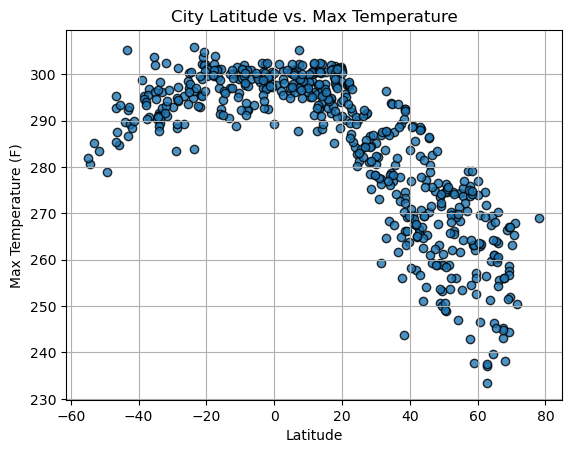

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

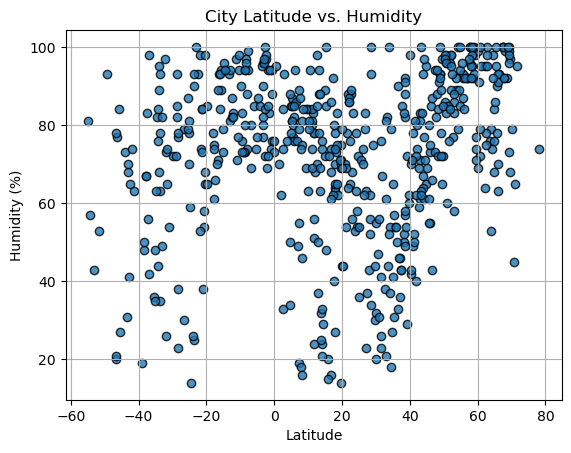

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

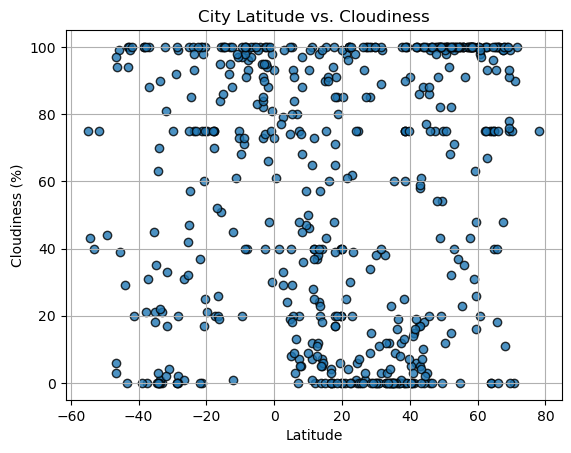

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

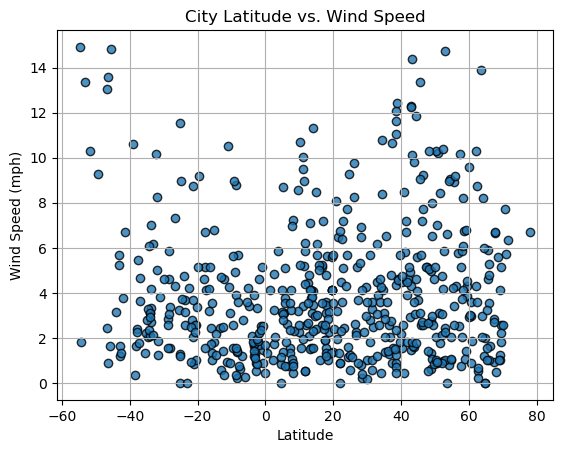

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talnakh,69.4865,88.3972,251.99,97,99,2.57,RU,1736375547
2,saipan,15.1355,145.7010,300.54,85,75,5.66,MP,1736375550
3,pathein,16.7833,94.7333,291.71,86,4,2.56,MM,1736375551
4,dzhalagash,45.0833,64.6667,265.34,69,3,3.68,KZ,1736375552
6,aasiaat,68.7098,-52.8699,266.38,92,100,5.57,GL,1736375556


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,290.71,98,88,4.66,SH,1736375549
5,invercargill,-46.4000,168.3500,287.60,77,94,0.89,NZ,1736375419
8,port-aux-francais,-49.3500,70.2167,279.03,93,44,9.27,TF,1736375558
14,port douglas,-16.4833,145.4667,301.07,71,26,3.18,AU,1736375565
17,flying fish cove,-10.4217,105.6791,298.97,94,75,3.09,CX,1736375570


###  Temperature vs. Latitude Linear Regression Plot

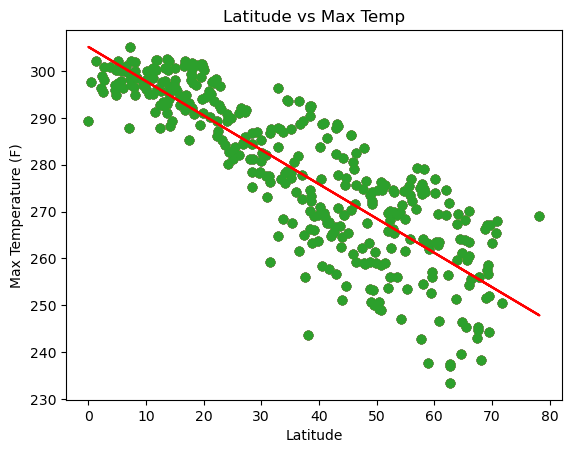

In [48]:
# Linear regression on Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Latitude vs Max Temp"
xlabel = "Latitude"
ylabel = "Max Temperature (F)"
text_coordinates = (10, -20)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)
plt.show()




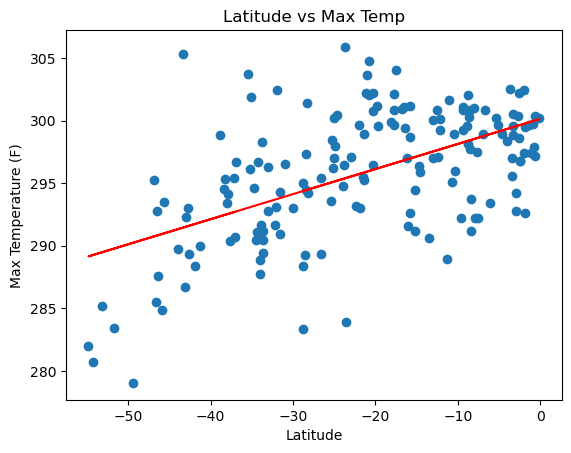

In [50]:
# Linear regression on Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Latitude vs Max Temp"
xlabel = "Latitude"
ylabel = "Max Temperature (F)"
text_coordinates = (10, -20)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# When analyzing the relationship between latitude and max temperature, there appears to be a 
# negative correlation in the northern hemisphere and a positive correlation in the southern hemisphere.
# This means that, in the northern hemisphere, the max temperature decreases as the latitude increases. 
# In the southern hemisphere, however, the max temperature increases as the latitude increases and approaches 0.
# This makes sense as we know that temperatures are generally warmer near the equator and cooler near the poles.


### Humidity vs. Latitude Linear Regression Plot

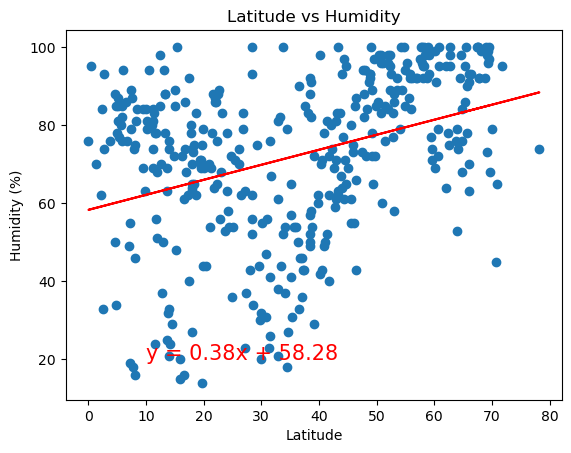

In [57]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Latitude vs Humidity"
xlabel = "Latitude"
ylabel = "Humidity (%)"
text_coordinates = (10, 20)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)
plt.show()

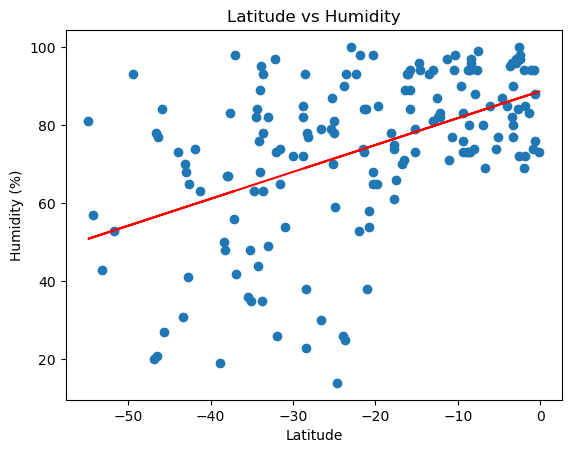

In [58]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Latitude vs Humidity"
xlabel = "Latitude"
ylabel = "Humidity (%)"
text_coordinates = (10, 20)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# In both hemispheres, there appears to be a slight positive correlation between latitude and humdidity.
# This means that as latitude increases, the humidity also increases. However, the correlation seems to be weak.
# Interestingly, the correlation seems to be stronger in the southern hemisphere
# and humidity appears to be higher when the latitude is closer to 0.

### Cloudiness vs. Latitude Linear Regression Plot

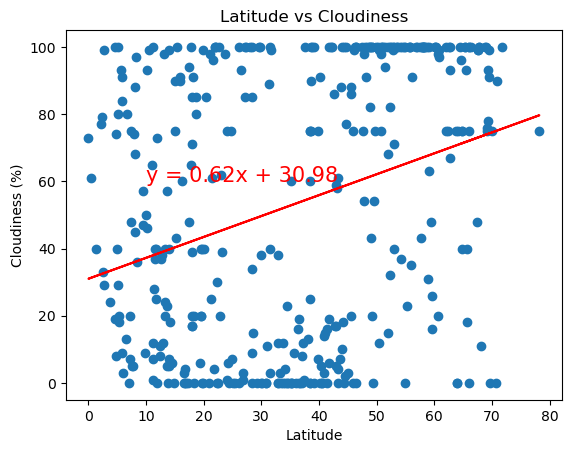

In [60]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Latitude vs Cloudiness"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
text_coordinates = (10, 60)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)
plt.show()

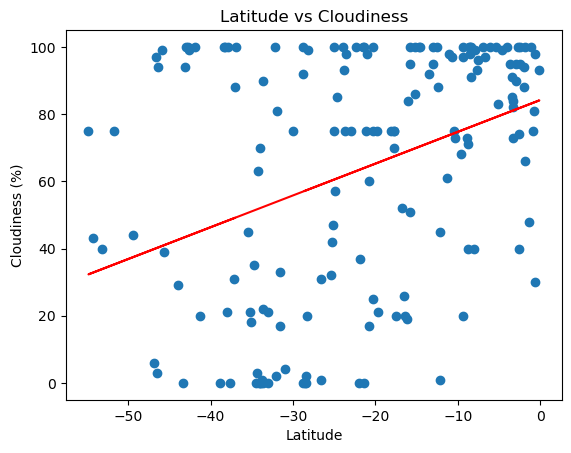

In [61]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Latitude vs Cloudiness"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
text_coordinates = (10, 60)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There appears to be no significant correlation between cloudiness and latitude in both hemispheres.
# Therefore, we can conclude cloudiness is not dependent on latitude in either hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

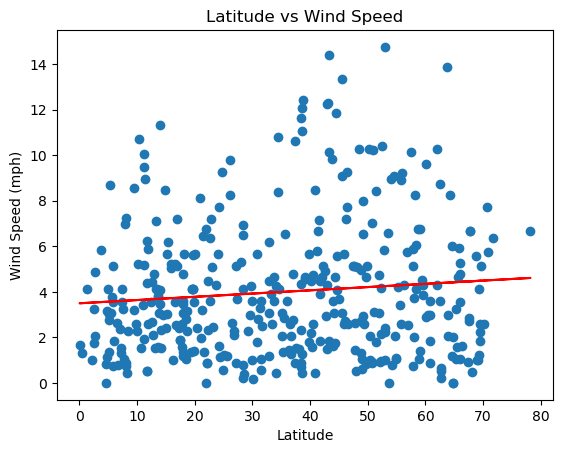

In [62]:
# Northern Hemisphere
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Latitude vs Wind Speed"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
text_coordinates = (10, 20)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)
plt.show()

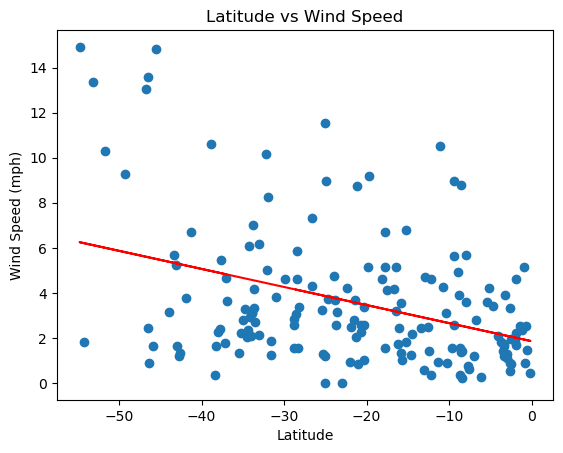

In [63]:
# Southern Hemisphere
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Latitude vs Wind Speed"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
text_coordinates = (10, 20)
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There appears to be no significant correlation between wind speed and latitude in both hemispheres.